# Prelucrarea Semnalelor
## Laborator 2
### Miu Elena Adania
### Grupa 333

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile

## Ex1. 
### Generati un semnal sinusoidal de tip sinus, de amplitudine, frecventa si faza aleasa de voi. Generati apoi un semnal de tip cosinus astfel incat pe orizontul de timp ales, acesta sa fie identic cu semnalul sinus. Verificati afisandu-le grafic in doua subplot-uri diferite.

In [74]:
frequency = 2
time = np.arange(0, 1, 0.001)

In [86]:
# Generate signals
signal_sin = np.sin(2 * np.pi * frequency * time )

signal_cos = np.cos(2 * np.pi * frequency * time - np.pi / 2)

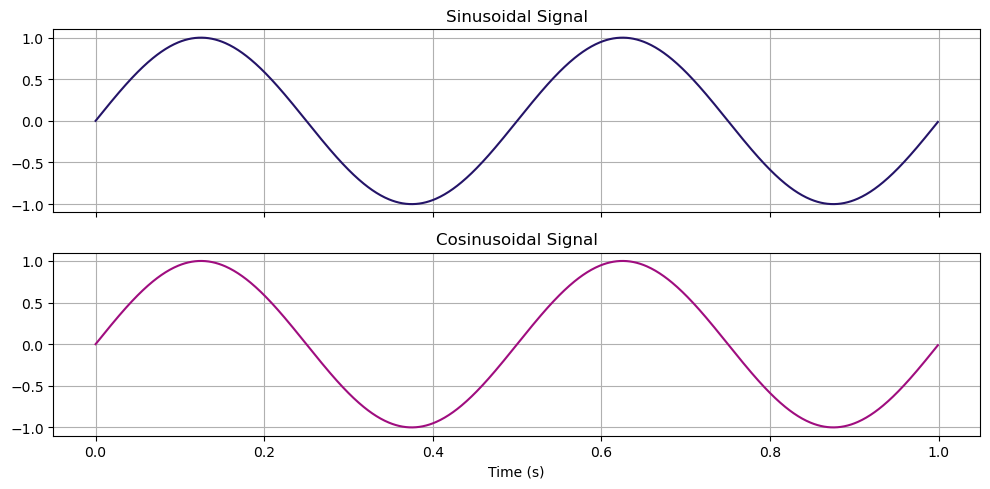

In [88]:
# Plot the signals

figure, axis = plt.subplots(2, sharex=True, figsize=(10, 5))

axis[0].set_title('Sinusoidal Signal')
axis[0].plot(time, signal_sin, color='#241468')

axis[1].set_title('Cosinusoidal Signal')
axis[1].plot(time, signal_cos, color='#9F0D7F')

axis[1].set_xlabel('Time (s)')

for ax in axis:
    ax.grid(True)
    
plt.tight_layout()

plt.show()

## Ex2.
### 2. Generati un semnal sinusoidal de amplitudine unitara si frecventa aleasa de voi. Incercati 4 valori diferite pentru faza. Afisati toate semnalele pe acelasi grafic. Adaugati zgmot aleator sinusoidelor esantionate generate.
### Noul semnal este x[n] + γz[n] astfel incat raportul semnal zgomot (Signal to Noise Ratio sau SNR) sa fie {0.1, 1, 10, 100}. SNR este definit astfel: 
### SNR = ∥x∥2 2 / y^2 * ∥z∥2 2
### Vectorul z este generat esantionand distributia Gaussiana standard iar parametrul γ se calculeaza astfel incat sa avem valorile SNR dorite.


## Ex3.
### Ascultati semnalele pe care le-ati generat la laboratorul precedent pentru exercitiile 2.(a)-(d) folosind biblioteca sounddevice. 
### Salvati unul din semnale ca fisier .wav si verificati ca il puteti incarca de pe disc utilizand scipy.io.wavfile.read().


In [100]:
# signal a
frequency = 400
samples = 1600
period = 1.0 / frequency
sampling_period = period / samples

time = np.linspace(0, samples * sampling_period, samples)
x = np.sin(2 * np.pi * frequency * time)

# Play Signal a
sd.play(x, 44100)
sd.wait()

# Save signal a as .wav file
wavfile.write("output_signal.wav", int(1 / sampling_period), x)

# Upload Signal a .wav file
fs, signal_read = wavfile.read("output_signal.wav")

if np.array_equal(x, signal_read):
    print("Signal saved and read successfully.")
else:
    print("Error.")



Signal saved and read successfully.


## Ex4.
### Generati doua semnale cu forme de unda diferite (ex., unul sinusoidal, celalalt sawtooth) si adunati-le esantioanele. Afisati grafic cele doua semnale initiale si suma lor, fiecare in cate un subplot.


In [121]:
frequency = 1000 
time = np.arange(0, 1, 1 / frequency) 
fqr_sin = 5 
fqr_sawtooth = 2

In [122]:
# Generate Signals
signal_sin = np.sin(2 * np.pi * fqr_sin * time)

signal_sawtooth = 0.5 * ( time * fqr_sawtooth - np.floor(0.5 + time * fqr_sawtooth))

# Sum signals
signal_sum = signal_sin + signal_sawtooth

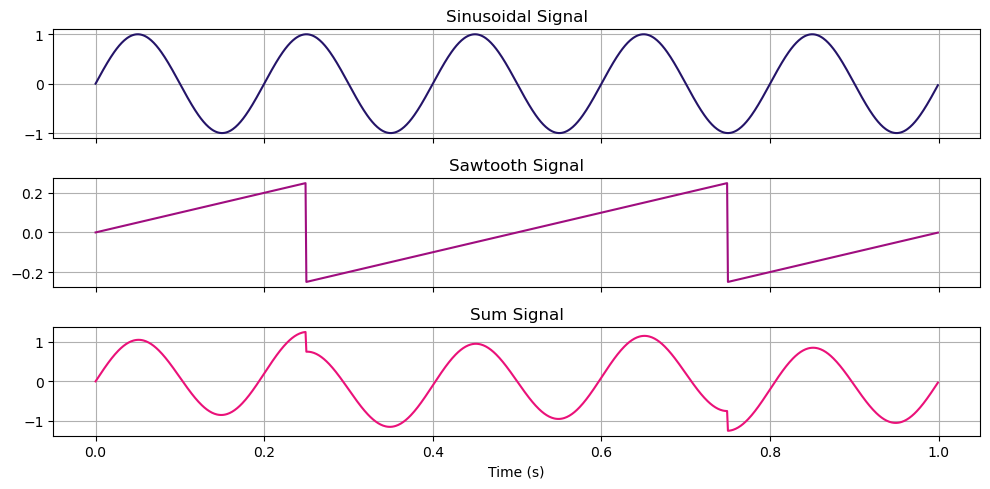

In [123]:
# Plot the signals

figure, axis = plt.subplots(3, sharex=True, figsize=(10, 5))

axis[0].set_title('Sinusoidal Signal')
axis[0].plot(time, signal_sin, color='#241468')

axis[1].set_title('Sawtooth Signal')
axis[1].plot(time, signal_sawtooth, color='#9F0D7F')

axis[2].set_title('Sum Signal')
axis[2].plot(time, signal_sum, color='#EA1179')

axis[2].set_xlabel('Time (s)')

for ax in axis:
    ax.grid(True)
    
plt.tight_layout()

plt.show()